In [1]:
!PIP install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
%reload_ext watermark
%watermark -a "Mateus Pereira Barboza"

Author: Opa



In [5]:
df_dsa = pd.read_csv('dataset.csv')

In [6]:
df_dsa.shape

(500, 5)

In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [8]:
df_dsa.describe(include = object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [9]:
df_dsa.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


## Visualizando a Distribuição das Variáveis Quantitativas

In [10]:
colunas_selecionadas = [list(df_dsa.columns)[i] for i in [0, 1, 4]]

In [11]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

In [12]:
df_dsa.columns[2]

'Genero'

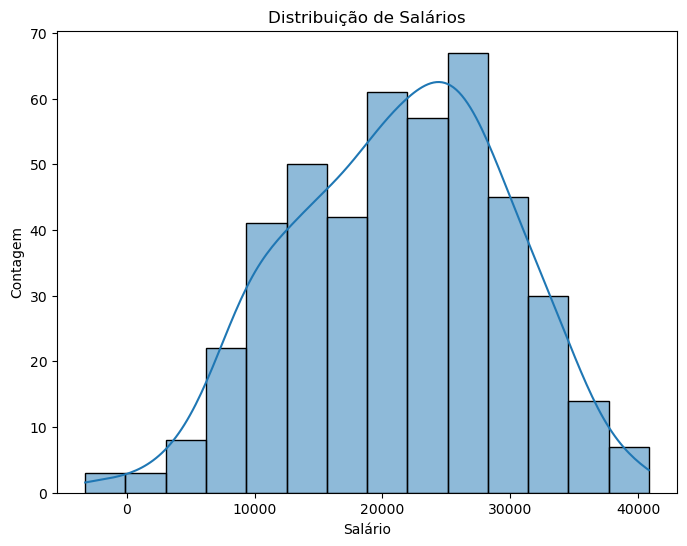

In [13]:
plt.figure(figsize = (8,6))
sns.histplot(df_dsa['Salario'], kde = True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Contagem')
plt.show()

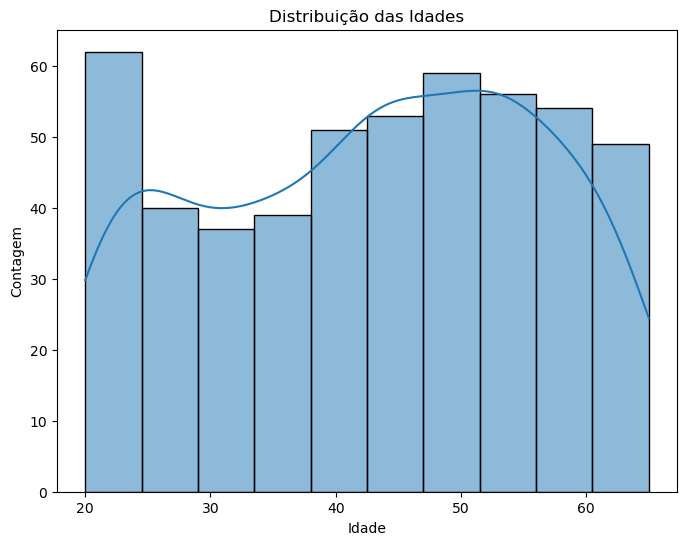

In [14]:
plt.figure(figsize = (8,6))
sns.histplot(df_dsa['Idade'], kde = True)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

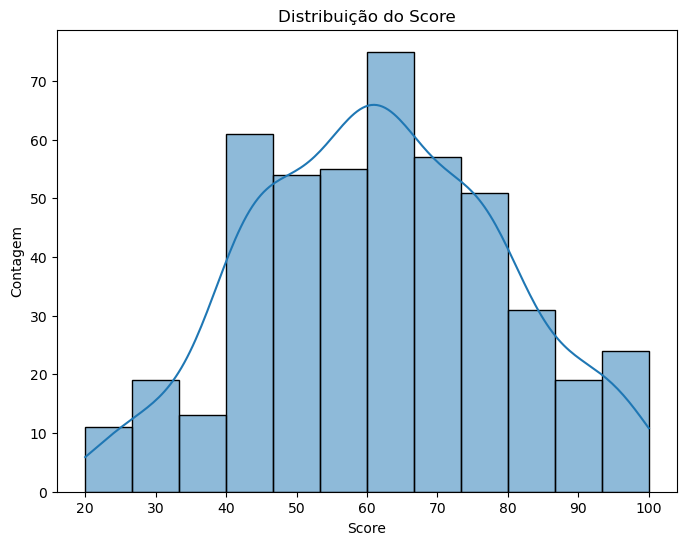

In [15]:
plt.figure(figsize = (8,6))
sns.histplot(df_dsa['Score_Exame_Psicotecnico'], kde = True)
plt.title('Distribuição do Score')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

## Visualizando a Distribuição das Variáveis Qualitativas

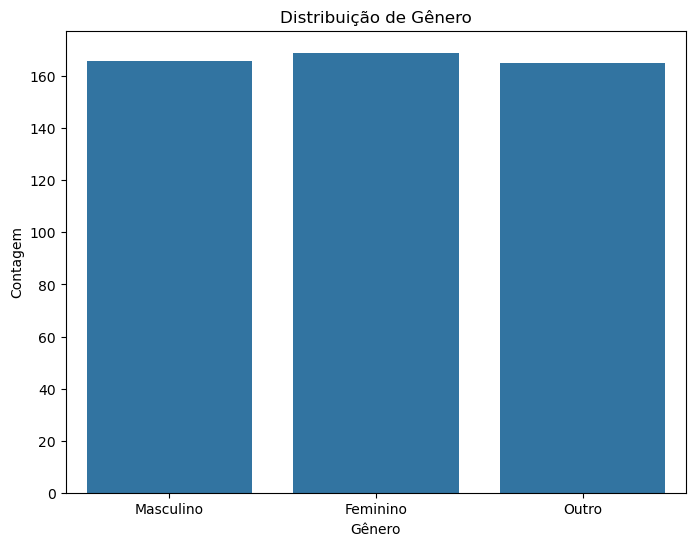

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(data = df_dsa, x = 'Genero')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

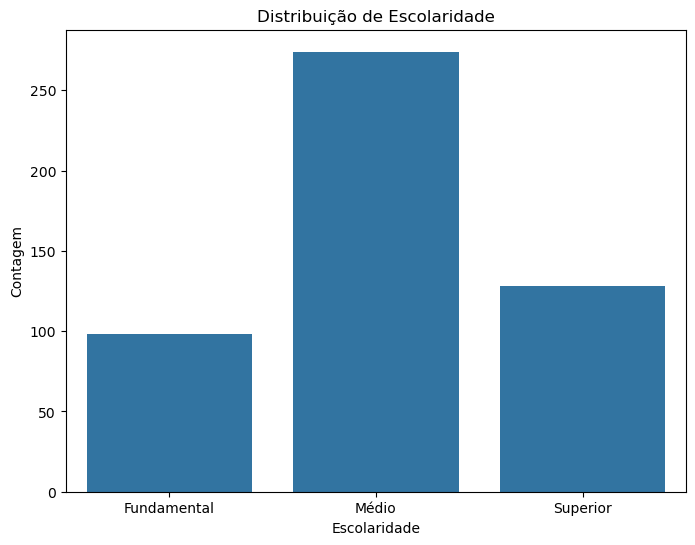

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(data = df_dsa, x = 'Escolaridade', order = ['Fundamental', 'Médio', 'Superior'])
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

## Correlação entre Variáveis Quantitativas

In [18]:
correlation_matrix = df_dsa[['Idade','Salario', 'Score_Exame_Psicotecnico']].corr()

In [19]:
correlation_matrix

,Idade,Salario,Score_Exame_Psicotecnico
Idade,1.000000,0.810266,-0.030818
Salario,0.810266,1.000000,-0.004153
Score_Exame_Psicotecnico,-0.030818,-0.004153,1.000000


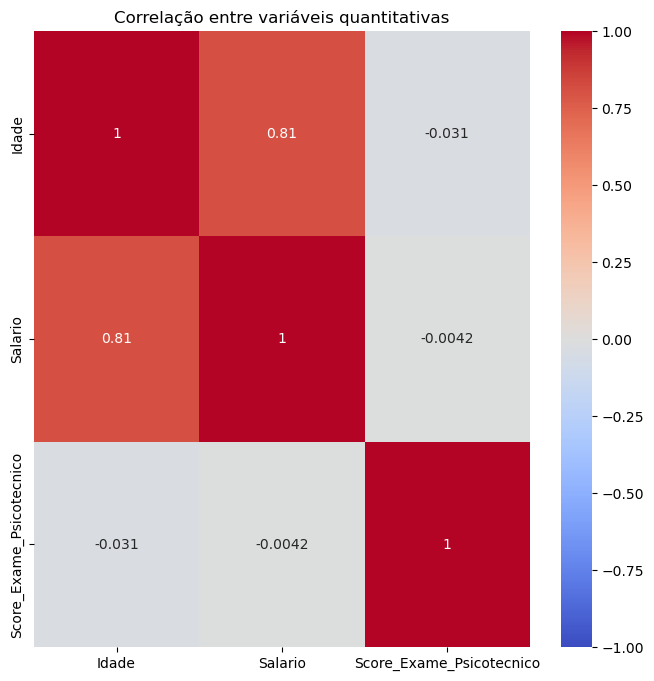

In [20]:
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

## Associação entre variáveis Qualitativas

In [21]:
tabela_contigencia = pd.crosstab(df_dsa['Genero'], df_dsa['Escolaridade'])

#### Tabela de Contigência: É basicamente uma tabela cruazada (crosstab) que mostra a frequência de observações em cada categoria para daus variáveis

In [22]:
tabela_contigencia

Escolaridade,Fundamental,Médio,Superior
Genero,,,
Feminino,31,90,48
Masculino,32,95,39
Outro,35,89,41


#### Testo do Qui-quadrado(x^2): É usado para testar a independência entre duas variáveis categóricas.
##### O teste do Qui-quadrado(chi-quadrado) é uma técnica estatística que é usada para determinar se há uma associação signifiticativa entre duas variáveis categóricas em um conjunto de dados. Existem váris hipóteses associadas ao teste do qui-quadrado:
##### Hipótese Nula (H0): A Hipótese nula afirma que não há associação significativa entre as duas variáveis categóricas no conunto de dados. Em outras palavras, as duas variáveis são independentes uma da outra.
##### Hipótese Alternativa (H1 ou Ha): A hipótese alternativa é a negação da hipótese nula. Ela seugere que há uma associação significativa entre as duas variáveis categóricas no conjunto de dados. Em termos simples, as duas variáveis não são independentes.
##### Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um nível de significância (geralmente 0,05) podemos rejeitar a hipótese nula de que as variáveis são independentes.


In [23]:
from scipy.stats import chi2_contingency

In [24]:
chi2, p, _, _ = chi2_contingency(tabela_contigencia)

In [25]:
print(f'Valor p do teste qui-quadrado: {p:.4f}')

Valor p do teste qui-quadrado: 0.8300


#### H0 Confirmada (Hipótese nula), provavelmente as duas variáveis são independentes uma da outra

### Coeficiente de Contingência de Cramér (V): Mede a força da associação entre duas variáveis nominais. Seu valor varia de 0 (sem associação) a 1 (associação perfeita). É baseado no valor do qui-quadrado.

In [26]:
n = tabela_contigencia.sum().sum()
phi2 = chi2 / n
r, k = tabela_contigencia.shape
cramers_v = np.sqrt(phi2/ min(r-1, k-1))
print(f'Coeficiente de Cramér V: {cramers_v:4f}')

Coeficiente de Cramér V: 0.038483


In [27]:
tabela_contigencia.shape

(3, 3)

## Técnicas de pré-processamento

### Valores duplicados

In [28]:
duplicatas = df_dsa.duplicated()

In [29]:
df_dsa[duplicatas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


### Valores negativos

In [30]:
df_dsa[df_dsa['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


In [31]:
df_dsa['Salario'] = df_dsa['Salario'].apply(lambda x: x if x >= 0 else None)

### Valores ausentes

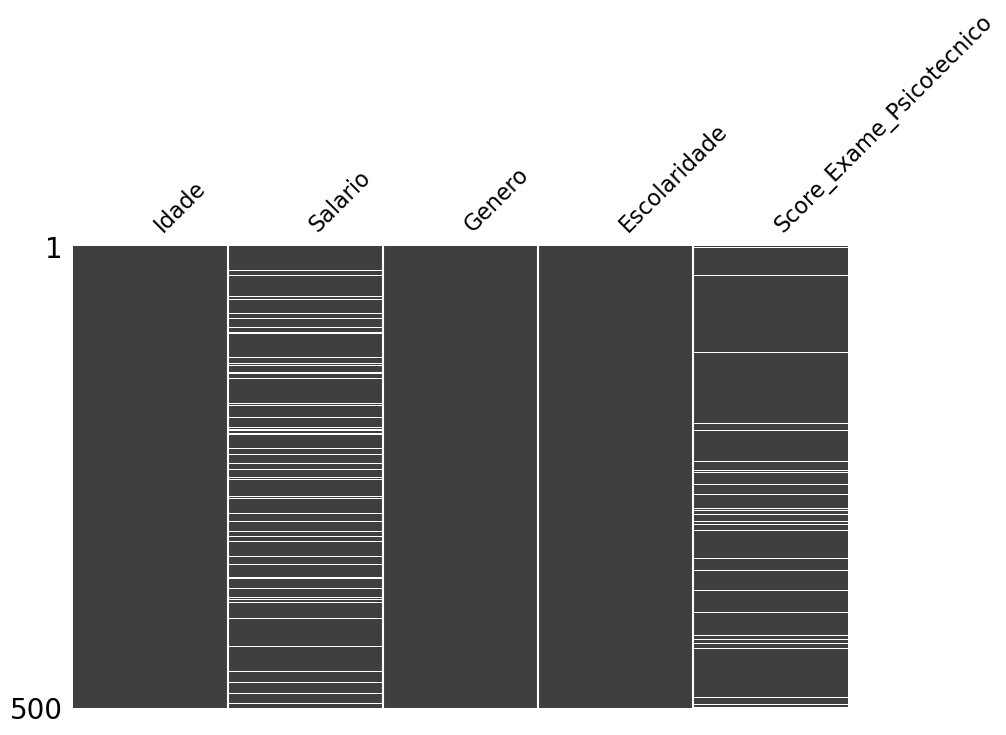

In [32]:
msno.matrix(df_dsa, figsize = (10,6), sparkline= False)
plt.show()

In [33]:
df_dsa.isna().sum()

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64

In [34]:
porcentagem_ausentes = (df_dsa.isna().mean() * 100).round(2)

In [35]:
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


In [36]:
df_dsa.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,447.000000,470.000000
mean,42.848000,21410.761236,61.565957
std,13.189725,8122.541954,17.662523
min,20.000000,641.777499,20.000000
25%,31.750000,15261.441185,48.000000
50%,44.000000,21755.179258,61.000000
75%,54.000000,27394.875390,74.000000
max,65.000000,40845.107626,100.000000


## Estratégias de Tratamento de Valores Ausentes

##### Quando você tem uma variável com valores ausentes, como nesse caso em que a variável "salario" tem 10% de valores ausentes, existem várias estratégias que você pode considerar para lidar com esses valores ausentes. A escolha da estratégia depende do contexto do seus dados e do objetivo da análise.
##### Algumas das estratégias comuns incluem:
##### Remoção de linhas: você pode optar por remover as linhas que contêm valores ausentes na coluna "salario". Isso é apropriado se a quantidade de dados faltantes for pequena for pequean em relação ao tamanho total do conjunto de dados e se a remoção não introduzir viés nos seus resultados. No entanto, essa estratégia pode levar à perda de informações:

##### Preenchimento com um valor padrão: Dpendendo do contexto, você pode optar por preencher os valores ausentes com um valor padrão, como a média, a mediana ou um valor específico. Isso pode ser apropriado se você acredita que os valores ausentes não são críticos e que um valor padrão não afetará significativamente a análise.

##### Preenchimento com base em outras variáveis: Às vezes, você pode usar informações de outras variáveis do dataset para preencher os valores ausentes de "salario". Por exemplo, você por preencher com a média dos salários de essoas com a mesma escolaridade ou o mesmo gênero.

##### Modelo de previsão: Se a variável "salario" for importante e os valores ausentes não puderem ser facilmente preenchidos com médias ou valores padrão, você pode criar um modelo preditivo para estimar os valores ausentes com base em outras variáveis relevantes. Isso é mais complexo, mas pode ser uma abordagem poderosa se você tiver dados suficientes e a variável "salario" for fundamental para sua análise.

## Teste de noarmalidade para decidir a estratégia de tratamento de Valores Ausentes

#### Só deve usar a média se a variável seguir uma distribuição normal, caso ao contrário deve se usar a mediana

In [46]:
from scipy import stats

#Extraindo a série "salário"
salario = df_dsa['Salario']

#Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(salario)

print(f'Estatística de teste: {stat}')
print(f'Valor-p: {p_valor}')

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nível de significância

if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é confirmada (os dados não seguem uma distribuição normal).")


Estatística de teste: nan
Valor-p: nan
A hipótese nula é confirmada (os dados não seguem uma distribuição normal).


## Imputação Para Tratamento de Valores Ausentes

In [47]:
media_salario = df_dsa['Salario'].mean()

In [49]:
df_dsa['Salario'].fillna(media_salario, inplace = True)

In [51]:
df_dsa.isna().sum()

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64

In [52]:
from scipy import stats

#Extraindo a série "salário"
score = df_dsa['Score_Exame_Psicotecnico']

#Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(score)

print(f'Estatística de teste: {stat}')
print(f'Valor-p: {p_valor}')

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nível de significância

if p_valor < alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é confirmada (os dados não seguem uma distribuição normal).")


Estatística de teste: nan
Valor-p: nan
A hipótese nula é confirmada (os dados não seguem uma distribuição normal).


In [53]:
media_score = df_dsa['Score_Exame_Psicotecnico'].mean()

In [54]:
df_dsa['Score_Exame_Psicotecnico'].fillna(media_score, inplace = True)

In [55]:
df_dsa.isna().sum()

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64

## Teste Estatístico de Relação Entre Variável Quantitativa e Qualitativa

In [56]:
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]

In [58]:
rotulos_faixas = ['Menos de 25', '25-34', '35-44', '45-54', '55 ou mais']

In [59]:
rotulos_faixas

['Menos de 25', '25-34', '35-44', '45-54', '55 ou mais']

In [60]:
df_dsa['Faixa_Etaria'] = pd.cut(df_dsa['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [61]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,58,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,45-54
2,34,15959.388748,Masculino,Médio,57.000000,25-34
3,62,28534.995327,Outro,Superior,68.000000,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,25-34


In [62]:
df_dsa.drop('Idade', axis = 1, inplace = True)

In [68]:
df_dsa['Salario'] = df_dsa['Salario'].round().astype(int)
df_dsa['Score_Exame_Psicotecnico'] = df_dsa['Score_Exame_Psicotecnico'].round().astype(int)

In [69]:
df_dsa.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30405,Masculino,Médio,56,55 ou mais
1,20887,Feminino,Médio,62,45-54
2,15959,Masculino,Médio,57,25-34
3,28535,Outro,Superior,68,55 ou mais
4,10553,Outro,Fundamental,44,25-34


In [70]:
media_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].mean()
media_salario_por_faixa_etaria

C:\Users\mateus.barboza\AppData\Local\Temp\ipykernel_21628\39433774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].mean()


Faixa_Etaria
Menos de 25    13108.633803
25-34          14945.184783
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

In [71]:
median_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].median()
median_salario_por_faixa_etaria

C:\Users\mateus.barboza\AppData\Local\Temp\ipykernel_21628\1961640263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].median()


Faixa_Etaria
Menos de 25    12433.0
25-34          15387.5
35-44          21411.0
45-54          24283.0
55 ou mais     29345.0
Name: Salario, dtype: float64

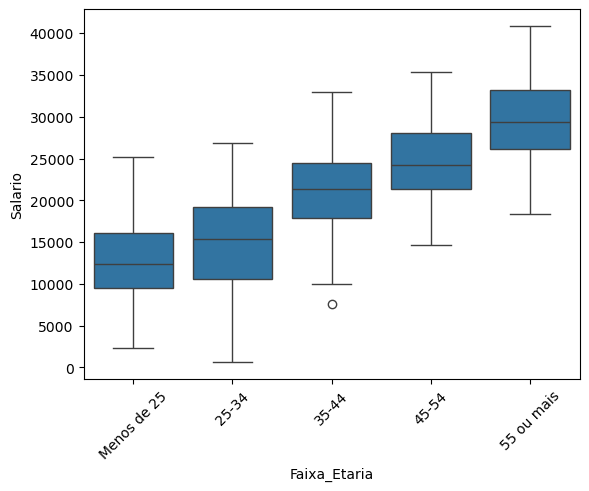

In [72]:
sns.boxplot(x = 'Faixa_Etaria', y = 'Salario', data = df_dsa)
plt.xticks(rotation = 45)
plt.show()

In [88]:
import scipy.stats as stats

resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df_dsa.groupby('Faixa_Etaria')])

if resultado_anova.pvalue > 0.05:
    print('Não há evidências de diferenças significativas nas médias de salário entre as faixas etárias.')
else:
    print('Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.')

Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.


C:\Users\mateus.barboza\AppData\Local\Temp\ipykernel_21628\1964875710.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df_dsa.groupby('Faixa_Etaria')])


In [89]:
nome, grupo in df_dsa.groupby('Faixa_Etaria')


C:\Users\mateus.barboza\AppData\Local\Temp\ipykernel_21628\2227538497.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nome, grupo in df_dsa.groupby('Faixa_Etaria')


(     Salario     Genero Escolaridade  Score_Exame_Psicotecnico Faixa_Etaria
 0      30405  Masculino        Médio                        56   55 ou mais
 3      28535      Outro     Superior                        68   55 ou mais
 6      30785  Masculino        Médio                        53   55 ou mais
 13     26699      Outro        Médio                        60   55 ou mais
 19     28542   Feminino     Superior                       100   55 ou mais
 ..       ...        ...          ...                       ...          ...
 476    37746  Masculino  Fundamental                        33   55 ou mais
 491    34103      Outro  Fundamental                        60   55 ou mais
 492    28889   Feminino        Médio                        43   55 ou mais
 497    34904   Feminino        Médio                        80   55 ou mais
 499    33296      Outro  Fundamental                        62   55 ou mais
 
 [103 rows x 5 columns],
 False)